# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ahmad Musthofanur]
- **Email:** [musthofanoers@gmail.com]
- **ID Dicoding:** [mvstofa]

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah sewa sepeda berdasarkan musim atau cuaca?
- Bagaimana perbandingan sewa sepeda pada hari libur dan bukan libur?

## Import Semua Packages/Library yang Digunakan

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [34]:
# Membuat tabel day_df
day_df = pd.read_csv('Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [35]:
# Membuat tabel hour_df
hour_df = pd.read_csv('Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day_df ini berisi data harian yang menunjukkan total sewa sepeda
- Dataset hour_df ini berisi data sewa sepeda berdasarkan jam dalam sehari

### Assessing Data

In [36]:
# Menilai data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [37]:
# Melihat apakah ada missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [38]:
# Melihat apakah ada data yang terjadi duplikasi
day_df.duplicated().sum()

np.int64(0)

In [39]:
# Melihat ringkasan parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [40]:
# Menilai data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [41]:
# Melihat dan memastikan apakah ada missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [42]:
print('Jumlah duplikasi data:', hour_df.duplicated().sum())

Jumlah duplikasi data: 0


In [43]:
# Melihat apakah ada inaccurate value pada kolom
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terjadi kesalahan Dtype pada kolom dteday yang bertipe object di day_df dan hour_df

### Cleaning Data

In [44]:
# Mengubah Dtype pada kolom dteday yang bertipe object pada day_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [45]:
# Mengubah Dtype pada kolom dteday yang bertipe object pada hour_df
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Mengubah Dtype pada kolom dteday yang bertipe object pada hour_df & day_df

## Exploratory Data Analysis (EDA)

### Explore ...

In [46]:
# Menggabungkan day_df dan hour_df berdasarkan kolom 'instant'
combined_df = pd.merge(hour_df, day_df, on='instant', how='left')
combined_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [47]:
# Hapus kolom yang duplikat (jika ada)
combined_df = combined_df.drop(columns=['holiday_y', 'season_y', 'weathersit_y'])

In [48]:
print(combined_df[combined_df['cnt_x'] != combined_df['cnt_y']])

       instant   dteday_x  season_x  yr_x  mnth_x  hr  holiday_x  weekday_x  \
0            1 2011-01-01         1     0       1   0          0          6   
1            2 2011-01-01         1     0       1   1          0          6   
2            3 2011-01-01         1     0       1   2          0          6   
3            4 2011-01-01         1     0       1   3          0          6   
4            5 2011-01-01         1     0       1   4          0          6   
...        ...        ...       ...   ...     ...  ..        ...        ...   
17374    17375 2012-12-31         1     1      12  19          0          1   
17375    17376 2012-12-31         1     1      12  20          0          1   
17376    17377 2012-12-31         1     1      12  21          0          1   
17377    17378 2012-12-31         1     1      12  22          0          1   
17378    17379 2012-12-31         1     1      12  23          0          1   

       workingday_x  weathersit_x  ...  mnth_y  wee

In [49]:
# Ekplorasi data day_df
combined_df.describe(include='all')

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,mnth_y,weekday_y,workingday_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,6.519836,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,4.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,7.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,10.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,12.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,3.451913,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [50]:
# Melihat demografi pengguna yang terdaftar atau registered bedasarkan cuaca
combined_df.groupby(by='registered_y').agg({
    'weathersit_x': ['max', 'min', 'mean', 'std']
})

weathersit_x             
                      max min mean std
registered_y                          
20.0                    1   1  1.0 NaN
416.0                   2   2  2.0 NaN
432.0                   1   1  1.0 NaN
451.0                   1   1  1.0 NaN
472.0                   2   2  2.0 NaN
...                   ...  ..  ...  ..
6844.0                  1   1  1.0 NaN
6898.0                  2   2  2.0 NaN
6911.0                  2   2  2.0 NaN
6917.0                  2   2  2.0 NaN
6946.0                  1   1  1.0 NaN

[679 rows x 4 columns]

In [51]:
combined_df.groupby('holiday_x')['cnt_x'].describe()


,count,mean,std,min,25%,50%,75%,max
holiday_x,,,,,,,,
0,16879.0,190.42858,181.981435,1.0,40.00,144.0,281.50,977.0
1,500.0,156.87000,156.757478,1.0,28.75,97.0,253.25,712.0


In [52]:
 
# Analisis pola penggunaan sepeda berdasarkan musim
combined_df.groupby(by='season_x').agg({
    'cnt_y' : ['mean', 'sum'],
    'casual_y': 'mean',
    'registered_y': 'mean'
})

cnt_y               casual_y registered_y
                 mean        sum        mean         mean
season_x                                                 
1         4504.348837  3292679.0  848.176471  3656.172367
2                 NaN        0.0         NaN          NaN
3                 NaN        0.0         NaN          NaN
4                 NaN        0.0         NaN          NaN

In [53]:
# Distribusi Jumlah Sewa Sepeda Berdasarkan Musim
combined_df.groupby('season_x')['cnt_x'].describe()


,count,mean,std,min,25%,50%,75%,max
season_x,,,,,,,,
1,4242.0,111.114569,119.224010,1.0,23.0,76.0,158.0,801.0
2,4409.0,208.344069,188.362473,1.0,46.0,165.0,311.0,957.0
3,4496.0,236.016237,197.711630,1.0,68.0,199.0,345.0,977.0
4,4232.0,198.868856,182.967972,1.0,46.0,155.5,295.0,967.0


In [54]:
# Distribusi Jumlah Sewa Sepeda Berdasarkan Cuaca
combined_df.groupby('weathersit_x')['cnt_x'].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit_x,,,,,,,,
1,11413.0,204.869272,189.487773,1.0,46.0,159.0,304.0,977.0
2,4544.0,175.165493,165.431589,1.0,40.0,133.0,257.0,957.0
3,1419.0,111.579281,133.781045,1.0,21.0,63.0,152.5,891.0
4,3.0,74.333333,77.925178,23.0,29.5,36.0,100.0,164.0


In [55]:
#Perbandingan Jumlah Sewa Sepeda pada Hari Libur dan Bukan Libur
combined_df.groupby('holiday_x')['cnt_x'].describe()


,count,mean,std,min,25%,50%,75%,max
holiday_x,,,,,,,,
0,16879.0,190.42858,181.981435,1.0,40.00,144.0,281.50,977.0
1,500.0,156.87000,156.757478,1.0,28.75,97.0,253.25,712.0


In [56]:
# Melihat hasil analisis rata-rata penyewaan per jam
combined_df.groupby(by='hr')[['cnt_y', 'registered_y', 'casual_y']].mean().reset_index()

,hr,cnt_y,registered_y,casual_y
0,0,4797.032258,3930.483871,866.548387
1,1,4713.903226,3826.806452,887.096774
2,2,4696.137931,3812.137931,884.000000
3,3,4413.857143,3473.285714,940.571429
4,4,3991.333333,3153.041667,838.291667
5,5,4484.107143,3633.142857,850.964286
6,6,4425.300000,3512.566667,912.733333
7,7,4348.548387,3540.419355,808.129032
8,8,4494.419355,3613.838710,880.580645
9,9,4242.419355,3525.774194,716.645161


**Insight:**
- Musim semi dan panas kemungkinan besar menunjukkan jumlah sewa sepeda yang lebih tinggi, sementara musim gugur dan dingin cenderung memiliki penurunan
- Biasanya, jumlah sewa sepeda meningkat pada hari libur karena orang memiliki waktu luang lebih banyak untuk beraktivitas

## Visualization & Explanatory Analysis

### Pertanyaan 1: Visualisasi Distribusi Sewa Sepeda Berdasarkan Musim

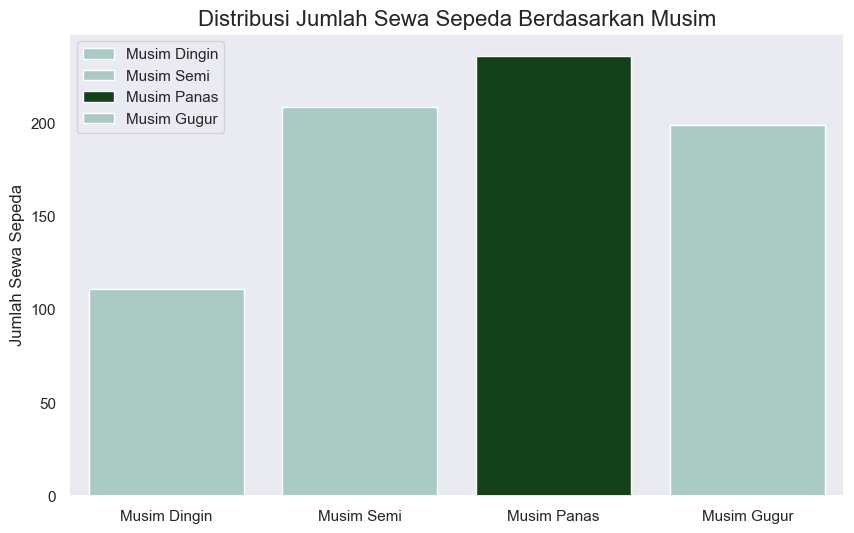

In [57]:
# 1. Visualisasi Distribusi Sewa Sepeda Berdasarkan Cuaca
colors = ["#A3D1C6", "#A3D1C6", "#0D4715", "#A3D1C6"]
plt.figure(figsize=(10, 6))

sns.barplot(x='season_x', y='cnt_x', data=combined_df, hue='season_x', palette=colors, errorbar=None)

plt.title('Distribusi Jumlah Sewa Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel(None)
plt.ylabel('Jumlah Sewa Sepeda', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.legend(title=None, labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])

plt.show()

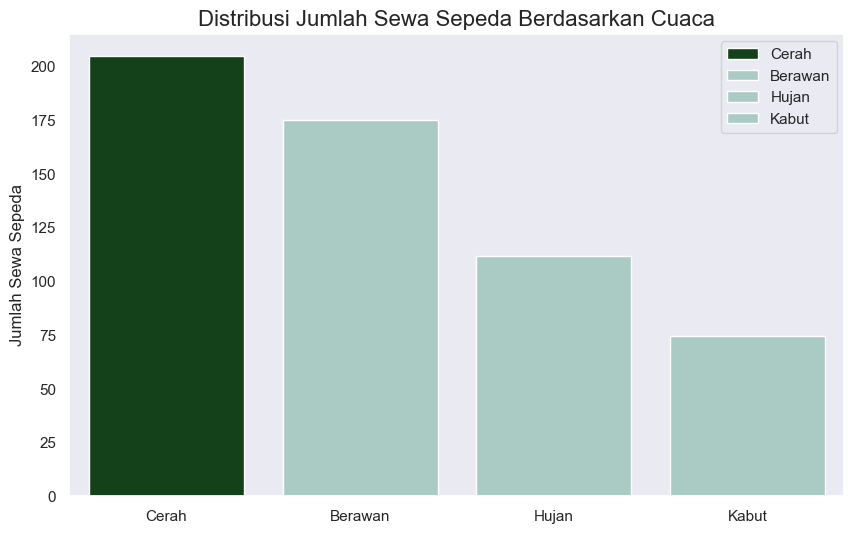

In [58]:
# 2. Visualisasi Distribusi Sewa Sepeda Berdasarkan Cuaca
plt.figure(figsize=(10, 6))
color = ["#0D4715", "#A3D1C6", "#A3D1C6", "#A3D1C6"]
sns.barplot(x='weathersit_x', y='cnt_x', data=combined_df, hue='weathersit_x', palette=color,  errorbar=None)
plt.title('Distribusi Jumlah Sewa Sepeda Berdasarkan Cuaca', fontsize=16)
plt.xlabel(None)
plt.ylabel('Jumlah Sewa Sepeda', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Cerah', 'Berawan', 'Hujan', 'Kabut'])
plt.legend(title=None, labels=['Cerah', 'Berawan', 'Hujan', 'Kabut'])

plt.show()

### Pertanyaan 2: Bagaimana perbandingan sewa sepeda pada hari libur dan bukan libur?

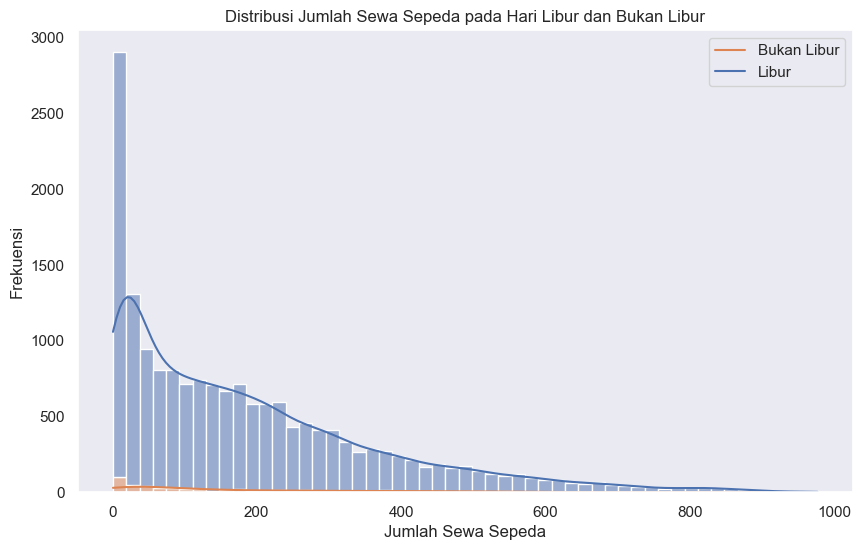

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='cnt_x', hue='holiday_x', multiple='stack', kde=True)
plt.xlabel('Jumlah Sewa Sepeda')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Sewa Sepeda pada Hari Libur dan Bukan Libur')
plt.legend(title=None, labels=['Bukan Libur', 'Libur'])
plt.show()

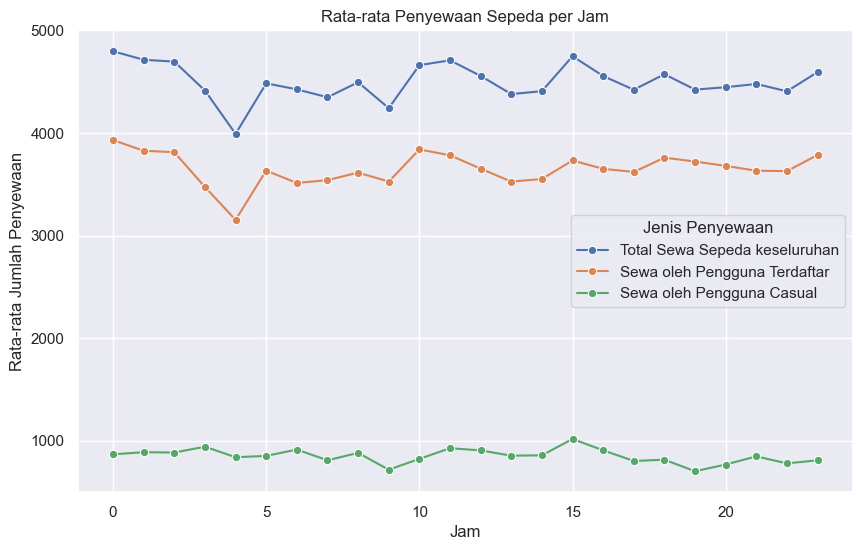

In [60]:
hourly_avg = combined_df.groupby(by='hr')[['cnt_y', 'registered_y', 'casual_y']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_avg, x='hr', y='cnt_y', label='Total Sewa Sepeda keseluruhan', marker='o')
sns.lineplot(data=hourly_avg, x='hr', y='registered_y', label='Sewa oleh Pengguna Terdaftar', marker='o')
sns.lineplot(data=hourly_avg, x='hr', y='casual_y', label='Sewa oleh Pengguna Casual', marker='o')

plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.legend(title='Jenis Penyewaan')
plt.grid(True)
plt.show()

**Insight:**
- Melihat batang yang paling tinggi atau paling rendah bisa memberikan wawasan mengenai musim yang paling populer atau kurang populer untuk penyewaan sepeda.
- Penyewaan sepeda lebih tersebar pada hari bukan libur, ini bisa mengindikasikan bahwa penyewaan sepeda lebih bervariasi pada hari-hari biasa.

## Analisis Lanjutan (Opsional)

In [61]:
# Mengelompokkan data untuk membuat rfm_df dengan agregasi dasar
rfm_df = combined_df.groupby("cnt_y", as_index=False).agg({
    "cnt_y": "sum",       # Jumlah total penyewaan (Monetary)
    "dteday_x": "max",    # Tanggal transaksi terakhir (untuk recency)
    "registered_y": "sum", # Total penyewaan untuk registered user
    "casual_y": "sum",    # Total penyewaan untuk casual user
    "season_x": "max"     # Musim terakhir interaksi (untuk monetary)
})

# 1. Menghitung Recency
recent_date = combined_df["dteday_x"].max()

rfm_df["recency"] = rfm_df["dteday_x"].apply(lambda x: (recent_date - x).days)

# 2. Menghitung Frequency
rfm_df["frequency"] = combined_df.groupby(['registered_y', 'casual_y'])["cnt_y"].transform("sum")

# 3. Menghitung Monetary
rfm_df["monetary"] = combined_df.groupby("season_x")["cnt_y"].transform("sum")

print(rfm_df.head())


   cnt_y   dteday_x  registered_y  casual_y  season_x  recency  frequency  \
0   22.0 2011-01-31          20.0       2.0         1      700      985.0   
1  431.0 2011-01-02         416.0      15.0         1      729      801.0   
2  441.0 2011-02-02         432.0       9.0         1      698     1349.0   
3  506.0 2011-01-02         472.0      34.0         1      729     1562.0   
4  605.0 2011-01-03         491.0     114.0         1      728     1600.0   

    monetary  
0  3292679.0  
1  3292679.0  
2  3292679.0  
3  3292679.0  
4  3292679.0  


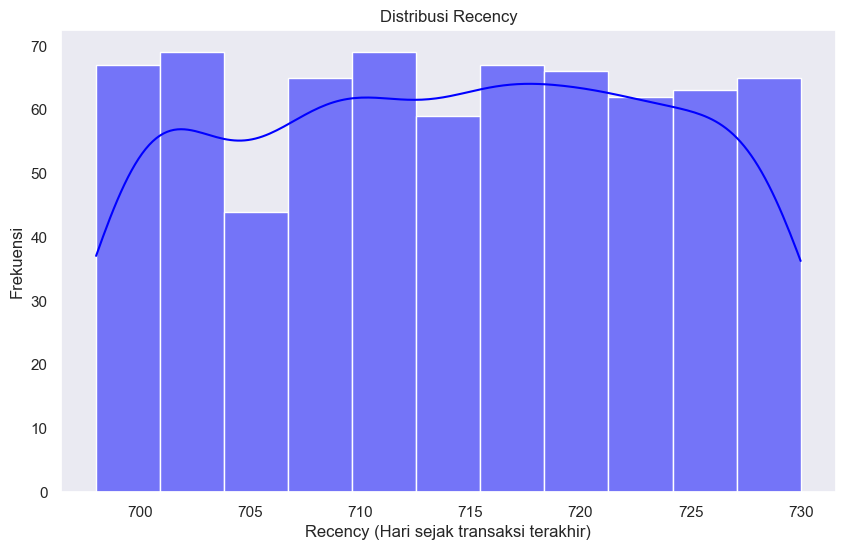

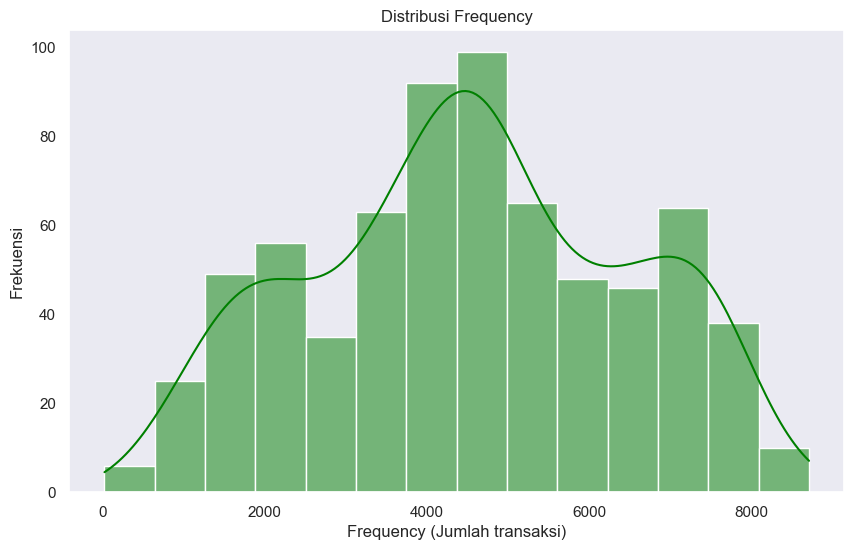

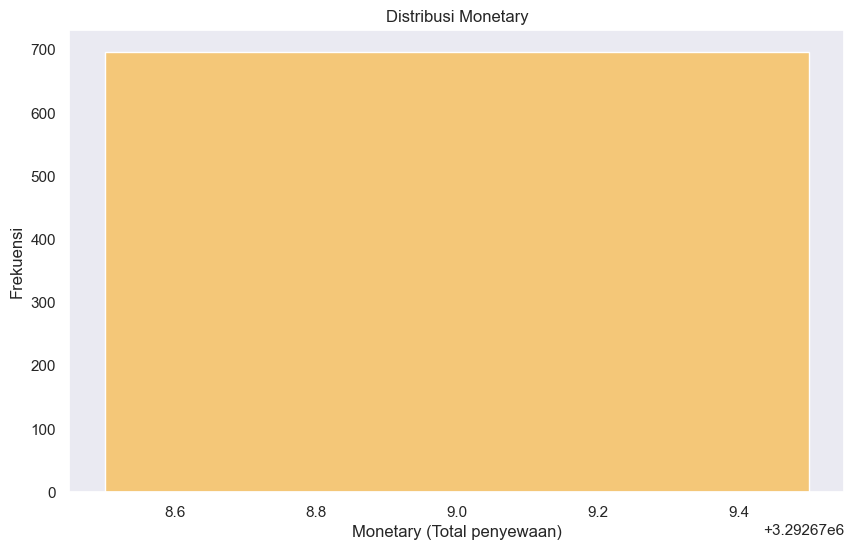

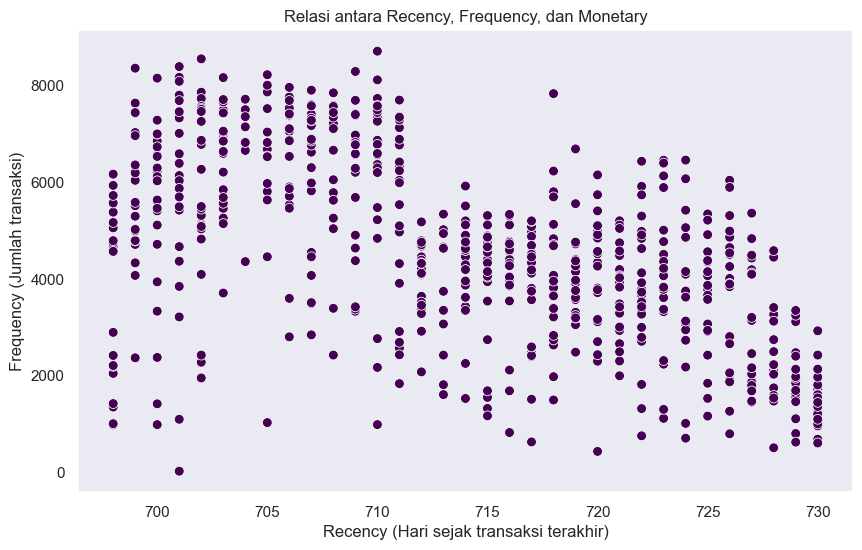

In [62]:
# 1. Visualisasi Distribusi Recency
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['recency'], kde=True, color='blue')
plt.title('Distribusi Recency')
plt.xlabel('Recency (Hari sejak transaksi terakhir)')
plt.ylabel('Frekuensi')
plt.show()

# 2. Visualisasi Distribusi Frequency
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['frequency'], kde=True, color='green')
plt.title('Distribusi Frequency')
plt.xlabel('Frequency (Jumlah transaksi)')
plt.ylabel('Frekuensi')
plt.show()

# 3. Visualisasi Distribusi Monetary
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['monetary'], kde=True, color='orange')
plt.title('Distribusi Monetary')
plt.xlabel('Monetary (Total penyewaan)')
plt.ylabel('Frekuensi')
plt.show()

# 4. Scatter Plot untuk Relasi antara Recency, Frequency, dan Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='frequency', size='monetary', data=rfm_df, hue='monetary', palette='viridis', sizes=(50, 200), legend=False)
plt.title('Relasi antara Recency, Frequency, dan Monetary')
plt.xlabel('Recency (Hari sejak transaksi terakhir)')
plt.ylabel('Frequency (Jumlah transaksi)')
plt.show()

In [63]:
combined_df.to_csv('all_data.csv', index=False)

## Conclusion

- 1. Berdasarkan analisis, tinggi atau rendahnya batang pada grafik dapat memberikan wawasan mengenai musim yang paling populer atau kurang populer untuk penyewaan sepeda
- 2. Selain itu, penyewaan sepeda yang lebih tersebar pada hari biasa, bukan hari libur, mengindikasikan bahwa permintaan penyewaan sepeda lebih bervariasi pada hari-hari kerja.